In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_confusion_matrix
from sklearn.datasets import make_classification, make_circles

In [ ]:
def loadDataset():
  dataset = datasets.load_iris()
  features = dataset.data
  labels = dataset.target
  return dataset, features, labels

In [ ]:
def prepareDataset(X, y, cls_remove=None):
   cls = [0, 1, 2]
   if cls_remove is not None:
     features = []
     labels = []
     for index, (feat, label) in enumerate(zip(X, y)):
       if y[index] != cls_remove:
         features.append(feat)
         labels.append(label)
     cls.pop(cls_remove)
   else:
     features = X
     labels = y
   return np.array(features)[:, 2:4], np.array(labels), cls

In [ ]:
def plotData(features, labels, cls, class_names):
  colors = ['r', 'b', 'g']
  markers = ['o', '*', '+']
  for class_index in range(len(cls)):
    plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
  Title = "Iris Dataset with {n} classes".format(n=int(len(cls)))
  plt.title(Title)
  plt.xlabel('Petal Length (cm)')
  plt.ylabel('Petal width (cm)')
  plt.legend()

In [ ]:
def plotRegions(model,X):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[XX.ravel(), YY.ravel()])
  ZZ = z.reshape(XX.shape)
  plt.contourf(XX, YY, ZZ, alpha=0.2)

In [ ]:
def getAccuracy(model, x, y):
  return model.score(x,y)*100

def getClassNames(target_names):
    cls_all = {}
    for i, label in enumerate(target_names):
        cls_all[i] = label
    return cls_all

Class names= {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
Updated class index: [0, 1, 2]
Number of samples: 150
Number of features: 2
Accuracy of model: 96.67%


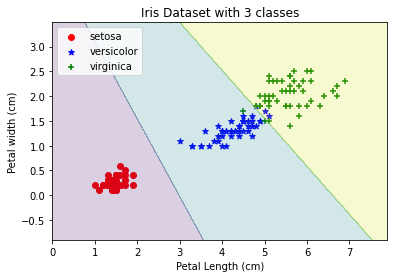


Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.96      0.94      0.95        50
           2       0.94      0.96      0.95        50

    accuracy                           0.97       150
   macro avg       0.97      0.97      0.97       150
weighted avg       0.97      0.97      0.97       150


Confusion Matrix:

[[50  0  0]
 [ 0 47  3]
 [ 0  2 48]]


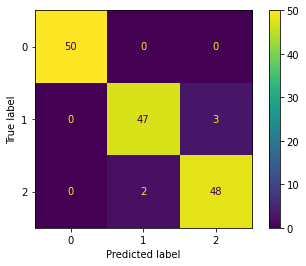

In [ ]:
def main():
    dataset, features, labels = loadDataset()
    X, y, cls_new = prepareDataset(features, labels, cls_remove=None)
    class_names = getClassNames(dataset.target_names)

    print('Class names=', class_names)
    print('Updated class index:', cls_new)
    print("Number of samples:", X.shape[0])
    print("Number of features:", X.shape[1])

    model = svm.SVC(kernel='linear', decision_function_shape='ovo')
    model.fit(X, y)
    print('Accuracy of model: {:.2f}%'.format(getAccuracy(model, X, y)))

    plotData(X, y, cls_new, class_names)
    plotRegions(model, X)
    plt.legend(loc="upper left")
    plt.show()

    y_true, y_pred = y, model.predict(X)
    print('\nClassification Report:\n')
    print(classification_report(y_true, y_pred))

    print('\nConfusion Matrix:\n')
    print(confusion_matrix(y, y_pred))
    plot_confusion_matrix(model, X, y)


if __name__ == '__main__':
    main()